 <h1 style="color:red"><center>¡Si se puede evitar no es un accidente!</center></h1>

<img src='images.jpg'>

**En los próximos minutos quiero presentarte a un enemigo silencioso**

Quizás no lo sabias, pero es responsable de:
+ La principal causa de muerte en todo el mundo, causando más de 17.9 millones de muertes cada año.
+ Cada 40 segundos, una persona muere a causa de una enfermedad cardiovascular en los Estados Unidos.

**Si, leiste bien! en el tiempo que llevamos murieron 3 personas a causa de una enfermedad relacionada al Corazón en los EEUU**

+ Se estima que para el año 2030, 23.6 millones de personas morirán anualmente por enfermedades cardiovasculares en todo el mundo.

ahora bien, **sabemos El 80% de las enfermedades cardiovasculares pueden prevenirse**:

En el siguiente análisis responderemos a los siguiente:

+ ¿Qué hábitos de vida saludables son más eficientes para prevenirlas, como dejar de fumar, hacer ejercicio regularmente y seguir una dieta saludable?
+ ¿Las enfermedades cardiovasculares solo afectan a los adultos mayores?

<h3 style="color:red; text-align:center">Librerias</h3>

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import YouTubeVideo, display

import statsmodels.formula.api as sm
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree





<h3 style="color:red; text-align:center">Dataset</h3>

Este conjunto de datos contiene información detallada sobre los factores de riesgo de enfermedad cardiovascular. Incluye información sobre edad, sexo, altura, peso, valores de presión arterial, niveles de colesterol, niveles de glucosa, hábitos de tabaquismo y consumo de alcohol de más de 70 mil personas. Además, indica si la persona es activa o no y si tiene alguna enfermedad cardiovascular. Las variables independientes en este conjunto de datos serán los factores de riesgos y las enfermemdades cardiovasculares la variable dependiente.

In [51]:
df = pd.read_csv('dataset/heart_data.csv')
df['age'] = round((df['age']/365))
df.drop(columns='id', inplace= True)
df.drop(columns='index', inplace= True)
df['imc'] = df['weight']/ pow((df['height']/100), 2)
df= df[['age', 'gender', 'imc', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio']]
df.head()

,age,gender,imc,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,21.967120,110,80,1,1,0,0,1,0
1,55.0,1,34.927679,140,90,3,1,0,0,1,1
2,52.0,1,23.507805,130,70,3,1,0,0,0,1
3,48.0,2,28.710479,150,100,1,1,0,0,1,1
4,48.0,1,23.011177,100,60,1,1,0,0,0,0


<h3 style="color:red; text-align:center">Conociendo mi Conjunto de Datos</h3>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   imc          70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 5.9 MB


<ul>
    <li  style="color:blue" > Todas mis columnas son numéricas</li>
    <li style="color:blue" > No tengo datos faltantes </li>
    <li style="color:blue" > Existen 10 variables </li>
    <li style="color:blue" > Mi variable dependiente es Cardio </li>
</ul>

<AxesSubplot:>

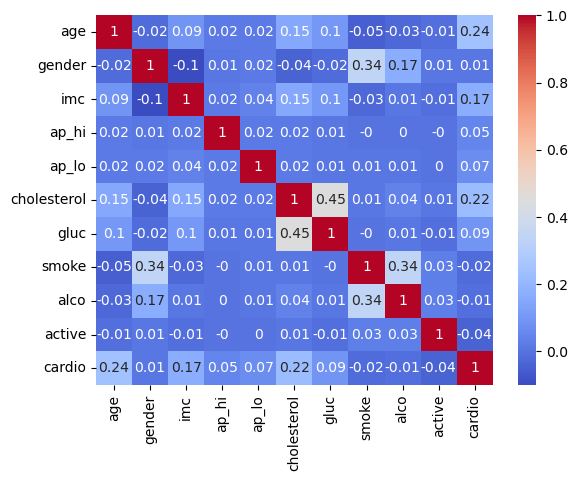

In [49]:
atributos = df.columns
correlacion = df[atributos].corr().round(2)
sns.heatmap(correlacion, annot=True, cmap='coolwarm')

<h4 style="color:blue" >Comienzo con un análisis de correlación para analizar la importancia de cada variable sobre la variable "Cardio" y la posibilidad de descartar o mejorar la implementación en análisis y posterior utilización en el Modelo, podemos verificar en esta primera instancia lo siguiente:</h4>

<ul>
    <li  style="color:blue" > La variable "Cardio" tiene mayor correlación con las Variables "Age, imc y Cholesterol"</li>
    <li style="color:blue" > Los hombres tienden a tener un mayor imc y consumir  alcohol y fumar más que las mujeres</li>
    <li style="color:blue" > Las personas altas tienden a ser más propensas a fumar</li>
    <li style="color:blue" > Mi variable dependiente es Cardio </li>
    <li style="color:blue" > El Colesterol esta fuertemente asociado a niveles altos de glucosa </li>
    <li style="color:blue" > Las personas con elevado imc tienden a tener mayores niveles de glucosa y colesterol</li>
</ul>


<h3 style="color:red; text-align:center">Limpieza de Datos</h3>

In [52]:
#verifico y elimino datos duplicados
df.drop_duplicates(inplace=True)
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 66182, dtype: bool

In [53]:
# Eliminar los datos nulos
df.dropna(inplace=True)
# Contar los datos nulos en cada columna
print(df.isnull().sum())
#df_heart.isnull().values.any()


age            0
gender         0
imc            0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


<h3 style="color:red; text-align:center">Análisis de los datos</h3>

In [54]:
print('Cantidad de filas:',df.shape[0])
print('Cantidad de columnas:',df.shape[1])


Cantidad de filas: 66182
Cantidad de columnas: 11


In [55]:
df.describe()


,age,gender,imc,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66182.000000,66182.000000,66182.000000,66182.000000,66182.000000,66182.000000,66182.000000,66182.000000,66182.000000,66182.000000,66182.000000
mean,53.365160,1.357242,27.703404,129.305219,97.607718,1.385996,1.238177,0.092774,0.056753,0.797634,0.513614
std,6.807698,0.479191,6.201712,158.370563,193.785436,0.692236,0.584145,0.290118,0.231371,0.401767,0.499818
min,30.000000,1.000000,3.471784,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,23.875433,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,26.573129,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,30.470522,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,298.666667,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<h3 style="color:red; text-align:center">Tratamiento de los Outliers</h3>

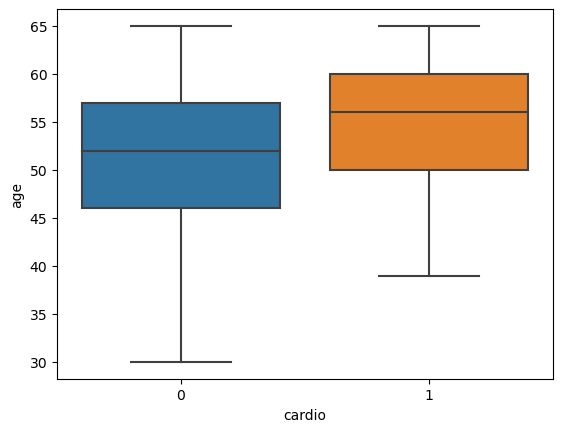

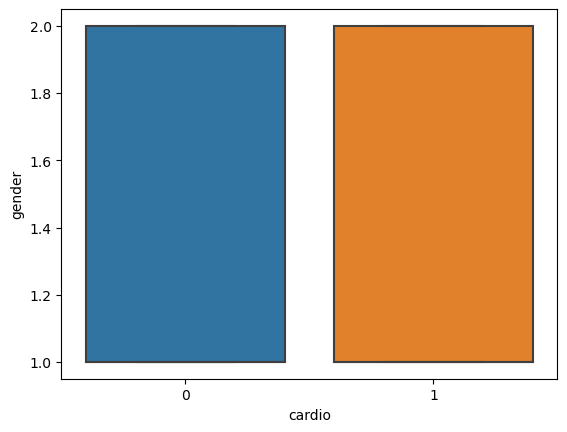

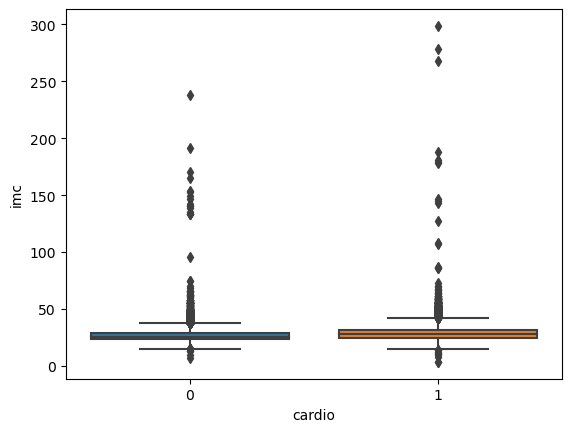

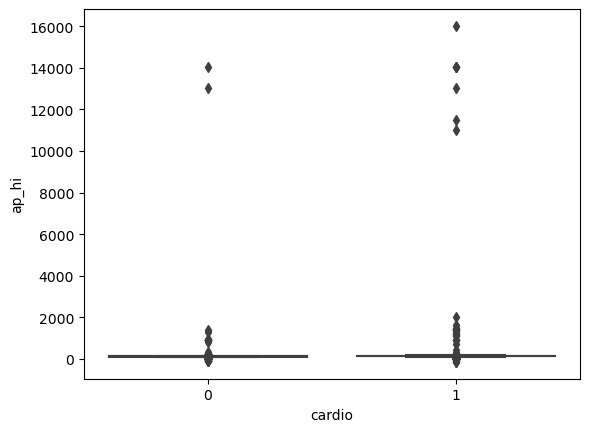

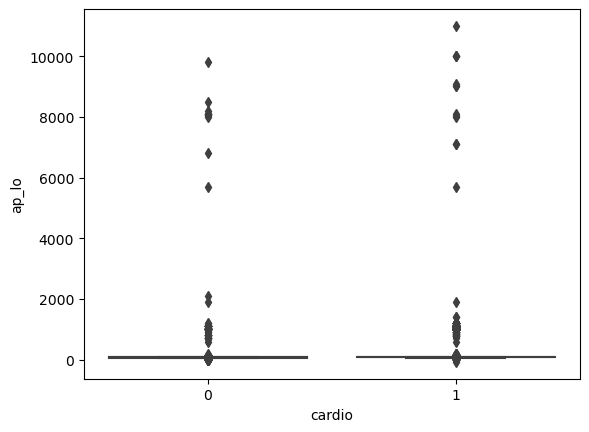

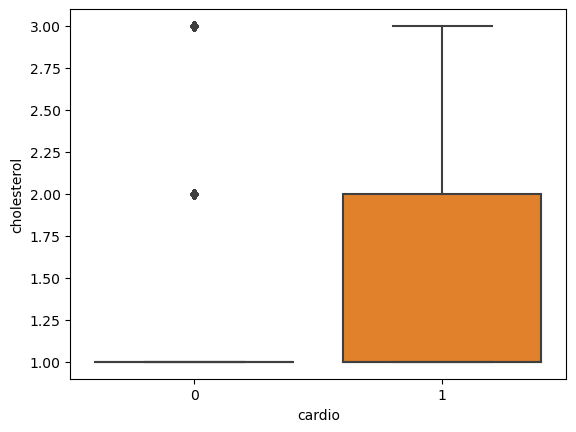

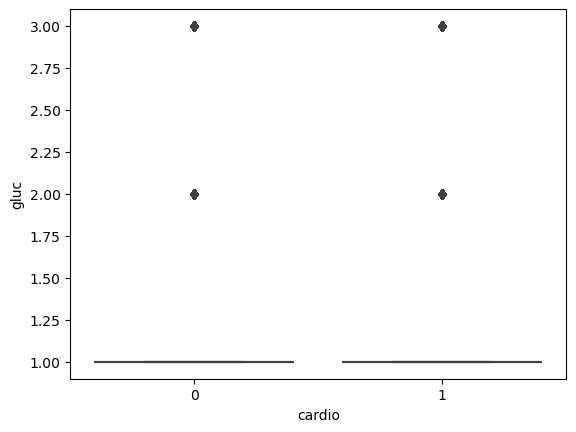

In [57]:
features = ['age','gender', 'imc', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
for i in features:                        
  sns.boxplot(data= df, y=i, x='cardio')
  plt.show()


In [58]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  ls = df.index[(df[ft]<lower_bound) |(df[ft]>upper_bound)]
  
  return ls

In [59]:
index_list = []
for ii in ['imc','ap_lo','cholesterol','gluc']:
  index_list.extend(outliers(df, ii))
len(index_list)

16816

In [60]:
def remove(df, ls):
  ls= sorted(set(ls))
  df = df.drop(ls)
  return df

In [61]:
df= remove(df, index_list)
len(df)

50667

In [62]:
print('Cantidad de filas:',df.shape[0])
print('Cantidad de columnas:',df.shape[1])

Cantidad de filas: 50667
Cantidad de columnas: 11


<h3 style="color:red; text-align:center">Visualización de los datos</h3>

In [63]:
var_gender = df["gender"].value_counts()
print('Cantidad de Hombres', var_gender[1])
print('Cantidad de Mujeres', var_gender[2])

Cantidad de Hombres 31820
Cantidad de Mujeres 18847


In [64]:
var_cardio = df["cardio"].value_counts()
print('Tienen antecedentes/enfermedades cardiovasculares', var_cardio[1])
print('No tienen antecedentes/enfermedades cardiovasculares', var_cardio[0])

Tienen antecedentes/enfermedades cardiovasculares 25167
No tienen antecedentes/enfermedades cardiovasculares 25500


<h4 style="color:red">Grafico 1</h4>

<AxesSubplot:xlabel='cardio', ylabel='count'>

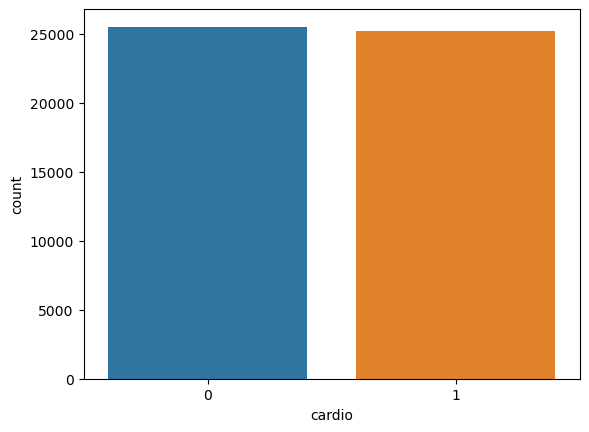

In [65]:
sns.countplot(x=df["cardio"])

En este gráfico podemos observar la distribución de la variable dependiente, la información que nos brinda es que del total del individuos de la muestra la cantidad de personas con enfermedades cardiovasculares es similar a las que no los tiene.

<h4 style="color:red">Grafico 2</h4>

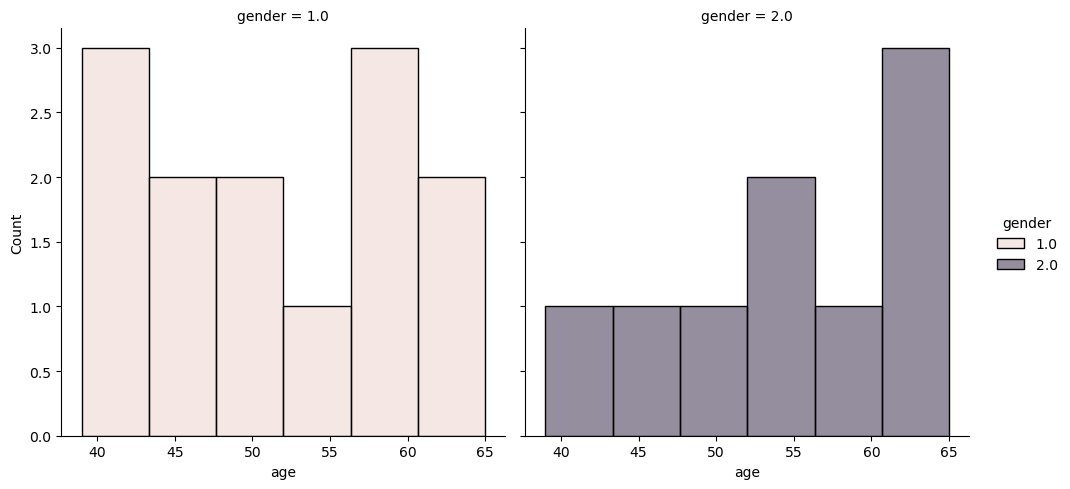

In [66]:
agr = df[['cardio','age']].groupby('age').sum()
agr['gender'] = df['gender']
df_agr = pd.DataFrame(agr)
sns.displot(data = df_agr, x = 'age', hue = 'gender', col = 'gender')


En este gráfico integramos otra variable de análisis, edad, e intentamos identificar que relación tenemos entre la edad, el sexo y la cantidad de enfermedades cardiovasculares. Este gráfico nos muestra algo bastante interesante, entre los 48 a los 58 años aproximadamente los hombres son más propensos a tener enfermedades relacionadas al corazón mientras que las mujeres entre los 42/38 años y luego de los 60.

<h4 style="color:red">Grafico 3</h4>

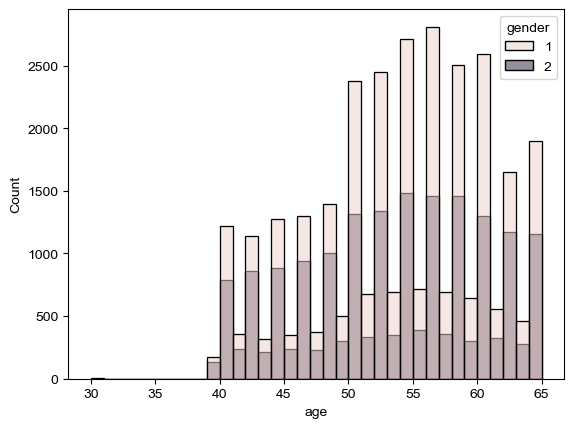

In [67]:
sns.histplot(data=df, x=df['age'],bins=35, hue='gender')
parametros = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = parametros)



Podemos observar una mala distribución en la muestra, ya que la cantidad de hombres supera a las mujeres.

<h4 style="color:red">Grafico 4</h4>

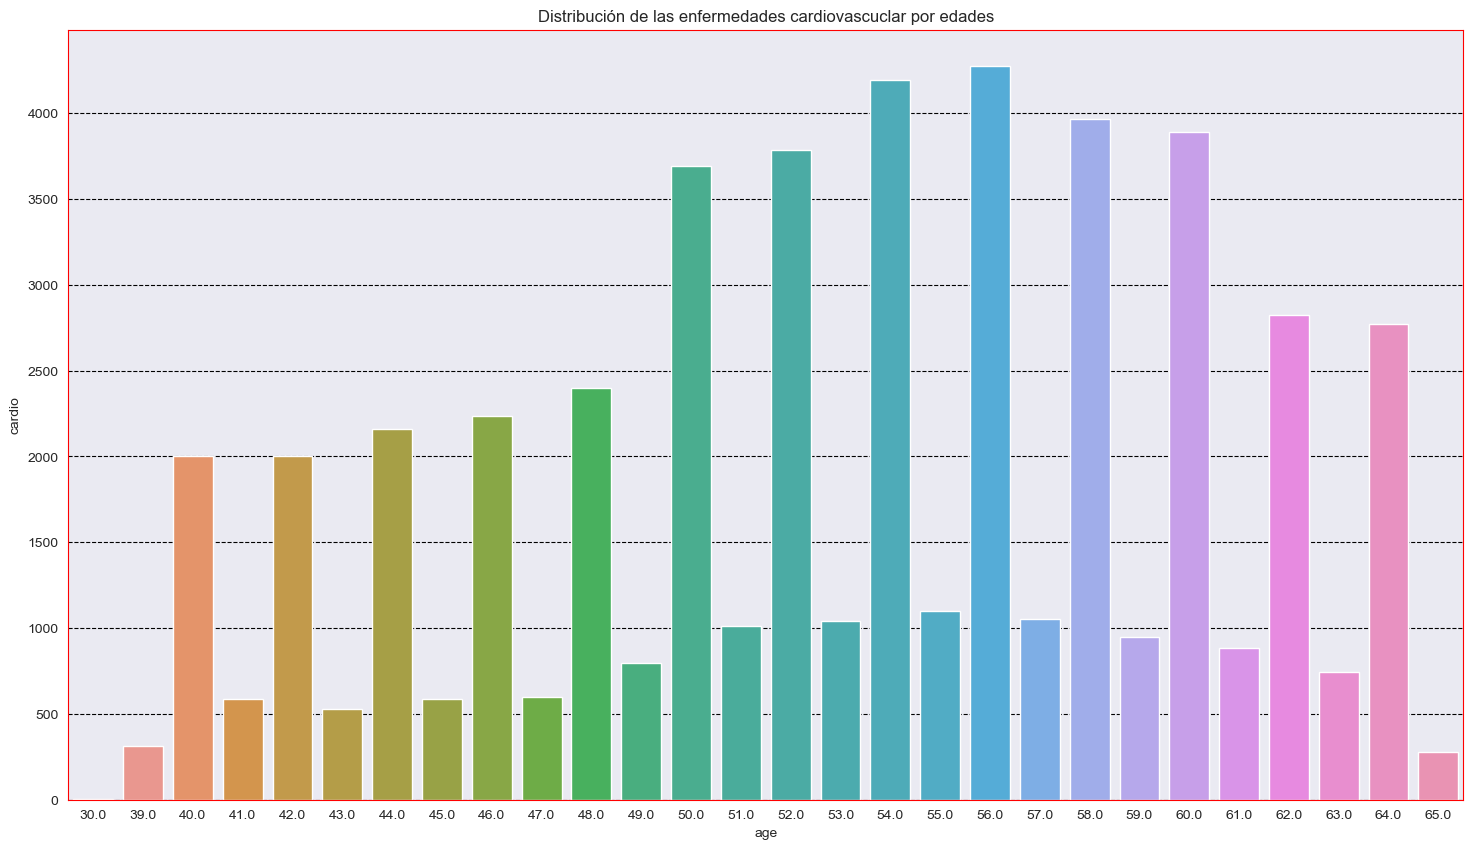

In [68]:
fig, ax = plt.subplots(figsize = (18, 10))
grouped_data = df.groupby('age', as_index = False).agg({'cardio' : 'count'})
sns.barplot(data = grouped_data, x = 'age', y = 'cardio')
plt.title('Distribución de las enfermedades cardiovascuclar por edades')
plt.show()

Este gráfico nos muestra la distribución de la edad y la cantidad de casos con enfermedades relacionadas al corazón, también nos muestra una tendencia que entre los 50 y 60 años existe más probabilidad de sufrir esta patología.

<h4 style="color:red">Grafico 6</h4>

C:\Users\Marcelo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Marcelo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Marcelo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


Text(0.5, 0.98, 'Matriz de dispersión de las variables ')

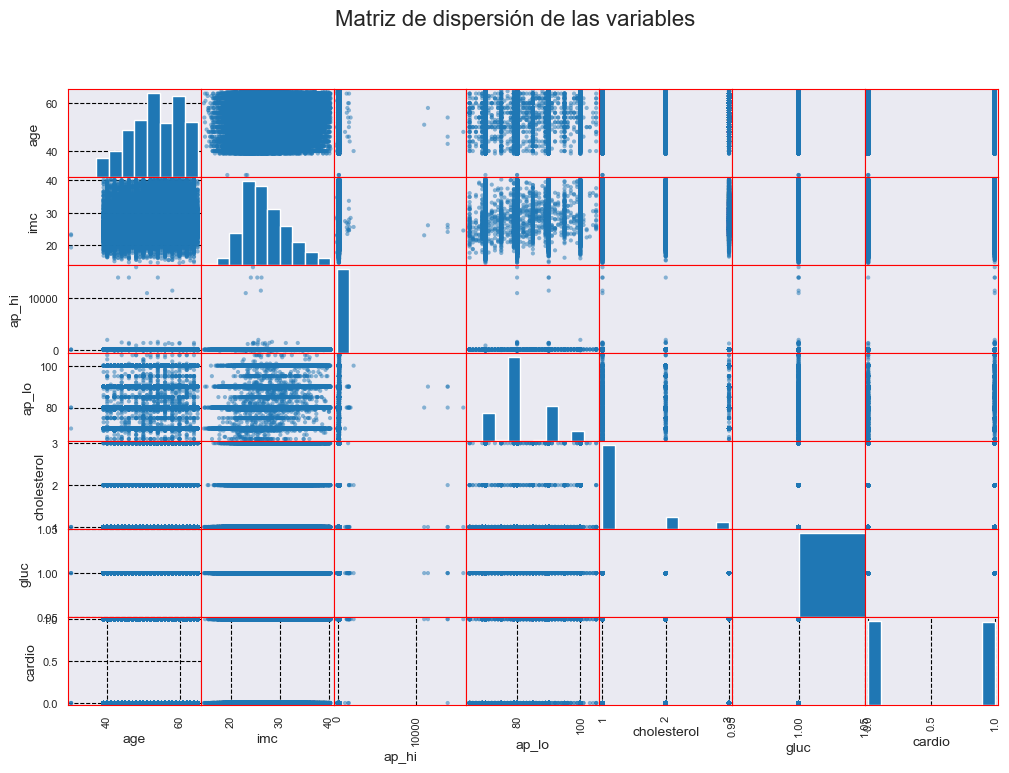

In [71]:
list_variables = ['age',
 'imc',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'cardio']
#scatter_matrix(df_heart[list_variables], figsize=(12,8))
pd.plotting.scatter_matrix(df[list_variables], alpha=0.5, figsize=(12, 8), diagonal='hist')
plt.suptitle('Matriz de dispersión de las variables ', fontsize=16)

<AxesSubplot:>

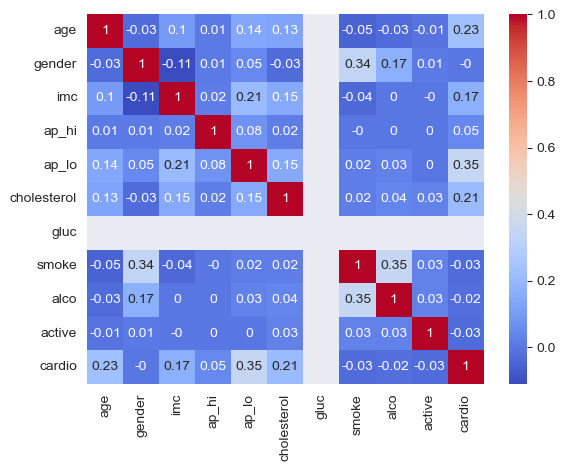

In [76]:
#Analizo la correlación entre las vatiables
atributos = df.columns
correlacion = df[atributos].corr().round(2)
sns.heatmap(correlacion, annot=True, cmap='coolwarm')

Luego del análisis del Dataset y su posterior limpieza, podemos observar las siguientes modificaciones con respecto al primer análisis de correlación efectuado:

En primer lugar, la Edad, el Indice de Masa Corporal y el Colesterol continuan siendo variables influyentes con variaciones minimas con respecto al primer gráfico de correlación, la novedad se produce con la variable "ap_lo" que representa la presión alta cuya variación en la correlación con respecto a los datos crudos es contundente pasando un 0.07 en el primer gráfico a 0.35 en el segundo. 

<h4 style="color:blue" >Lo que no deja se sorprender es la poca representatividad de las variables "Smoke, Alco y Active", lo que nos lleva a reeplantear la hipotesis de si el consumo de alcohol, cigarrillos y el desarrollo de actividades fisicas son factores que predisponen una enfermedad cardiovascular</h4>




<h3 style="color:red; text-align:center">Modelos</h3>

<h4 style="color:red">Regresión Lineal</h4>

In [77]:
model = 'cardio~age+gender+imc+ap_hi+ap_lo+cholesterol+gluc+smoke+alco+active+cardio'
heart   = sm.ols(formula = model, data = df).fit()
print(heart.summary())

                            OLS Regression Results                            
Dep. Variable:                 cardio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.793e+31
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        19:08:21   Log-Likelihood:             1.5892e+06
No. Observations:               50667   AIC:                        -3.178e+06
Df Residuals:                   50656   BIC:                        -3.178e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.332e-15   1.79e-16      7.457      

**"coef":** El coeficiente de regresión estimado es un valor que indica la relación entre la variable independiente y la variable dependiente en un modelo de regresión. También conocido como pendiente.

A travez de este indicador podemos observar la correlación que existe entre las variables y su sentido, en este caso por ejemplo la variable edad tiene una correlación negativa con las probabilidades de enfermedades cardiovasculares, es decir que a medida que aumenta la edad disminuyen los casos positivos, tiene cierta razonabilidad con los gráficos de distribución de las edades. Podriamos considerar la hipotesis de que quizas existe un error muestral ya que la cantidad de individuos por edad no es equitativa.

En definitiva, como estamos resolviendo un problema de clasificación, este modelo nos permite solo tener un pantallazo de las variables y su nivel de incidencia. siendo las más significativas (sexo, peso, presión alta, glucosa, tabaquismo y alcoholimo.

**"std err":** El error estándar se refiere a la cantidad de variabilidad en la estimación del coeficiente que se debe a la aleatoriedad de la muestra. con este indicador podemos observar poca precisión en la estimación de los coeficientes: género, tabaquismo, alcoholismo, actividad ya que el valor del coeficiente es elevado y por ende su intervalo de confianza.

**P>|t|:** Si analizamos este indicador, podemos concluir que en las variables tabaquismo y alcoholismo, no se puede afirmar que hay evidencia estadística de que el coeficiente tenga un efecto significativo en la variable dependiente.

<h4 style="color:red">Modelo Árbol de decisión</h4>

In [78]:
x = df.iloc[:,0:10].values
y = df.iloc[:, 10]


In [79]:
#Conjunto de datos en 55% entrenamiento y 45% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [80]:
#Entrenamiento del Árbol de decisión:
classifier = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [81]:
y_pred = classifier.predict(x_test)

In [82]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm[0][0]
print('True Positives, TP: ', cm[0][0], '  (se clasificaron como no cardio y efectivamente eran no cardio)')
print('False Positives, FP:', cm[0][1],'  (se clasificaron como no cardio y eran cardio)')
print('False Negatives, FN:', cm[1][0],'  (se clasificaron como cardio y eran no cardio)')
print('True Negatives, TN: ', cm[1][1], '  (se clasificaron como cardio y efectivamente eran cardio)')

predicciones =  ((cm[0][0] + cm[1][1])/ (cm[0][0]+ cm[0][1]+cm[1][0]+cm[1][1]))*100
print(predicciones,'% de aciertos')

True Positives, TP:  5108   (se clasificaron como no cardio y efectivamente eran no cardio)
False Positives, FP: 1319   (se clasificaron como no cardio y eran cardio)
False Negatives, FN: 2167   (se clasificaron como cardio y eran no cardio)
True Negatives, TN:  4073   (se clasificaron como cardio y efectivamente eran cardio)
72.4796715875898 % de aciertos


In [83]:
#Accuracy
from sklearn import metrics
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('f1 Score ', metrics.f1_score(y_test, y_pred))
print('ROC ', metrics.roc_auc_score(y_test, y_pred))
print('Recall ', metrics.recall_score(y_test, y_pred))


Accuracy  0.724796715875898
f1 Score  0.7003094910591472
ROC  0.7237482071828385
Recall  0.652724358974359


"Accuracy"
Podemos observar, de acuerdo a los gráficos, que las clases estan bastante balanceadas por lo que resulta útil tomar como metrica para analizar el modelo el Accuracy, en este último caso nos indica que su nivel de precisión es 72,28%. Es decir que del total de las predicciones, tiene el porcentaje indicado de acierto.

"f1 Score"
Cuestiones a tener en cuenta para utilizar esta métrica, si bien es ideal para casos de clasificación binaria (como es este caso), es más útil en situaciones donde las clases estan desequilibradas, y como vimos en el punto anterior no es el caso. Esta metrica nos aporta la relación entre la proporción de observaciones positivas identificadas correctamente y la proporción de observaciones positivas identificadas en relación al total de observaciones positivas.

Un valor de F1 Score de 0.7202068352589481 indica que el modelo de clasificación en cuestión tiene un rendimiento moderado en la clasificación de las observaciones en ambas clases.